In [1]:
import pandas as pd
import numpy as np

In [2]:
df_imdb_ratings = pd.read_csv('IMDB_ratings.csv')
df_imdb_movies = pd.read_csv('IMDB_movies.csv')
df_netflix = pd.read_csv('NETFLIX_TITLES.csv')

In [3]:
df_imdb_ratings.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [4]:
df_imdb_movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [5]:
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df_netflix.shape

(4675, 12)

In [7]:
df_imdb_movies.shape

(59164, 22)

In [8]:
df_netflix.isna().sum()

show_id            0
type               0
title              0
director        1443
cast             439
country          349
date_added         6
release_year       0
rating             8
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
df_netflix.nunique()

show_id         4675
type               2
title           4643
director        2605
cast            4116
country          454
date_added      1347
release_year      68
rating            14
duration         191
listed_in        421
description     4671
dtype: int64

In [11]:
df_netflix = df_netflix[df_netflix['country'].notnull()]

In [12]:
df_netflix['country']=df_netflix['country'].astype('str')


In [14]:
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt

### DATA Cleaning

### Which country creates highest content on netflix?

In [15]:
df_netflix['country'].value_counts().head(20)

United States                    1558
India                             594
United Kingdom                    255
Japan                             135
Canada                            105
South Korea                        97
Spain                              77
France                             68
Turkey                             60
Mexico                             54
Australia                          52
Taiwan                             48
United Kingdom, United States      40
Brazil                             39
Egypt                              39
Hong Kong                          36
Thailand                           36
Indonesia                          36
United States, Canada              33
China                              32
Name: country, dtype: int64

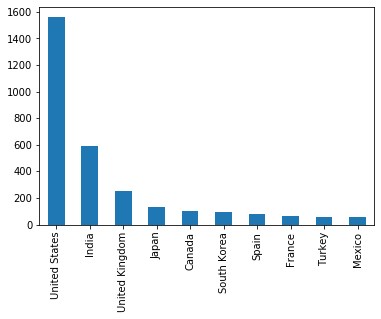

In [83]:
temp = df_netflix['country'].value_counts()
temp2 = temp.head(10)
temp2.plot(kind='bar')

Ans: <b>UNITED STATES</b>

In [16]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4326 entries, 0 to 4673
Data columns (total 12 columns):
show_id         4326 non-null int64
type            4326 non-null object
title           4326 non-null object
director        3109 non-null object
cast            3955 non-null object
country         4326 non-null object
date_added      4321 non-null object
release_year    4326 non-null int64
rating          4322 non-null object
duration        4326 non-null object
listed_in       4326 non-null object
description     4326 non-null object
dtypes: int64(2), object(10)
memory usage: 439.4+ KB


In [17]:
datacopy=df_netflix

In [18]:
datacopy['date_added'] = datacopy['date_added'].astype('datetime64[ns]')

In [19]:
from datetime import time
def conv_dates_series(df, col, old_date_format, new_date_format):
    df[col] = pd.to_datetime(df[col], format=old_date_format).dt.strftime(new_date_format)
    return(df)
old_date_format='%B %d, %Y'
new_date_format='%B'
datacopy=conv_dates_series(datacopy, "date_added", old_date_format, new_date_format)

In [20]:
temp = datacopy['date_added'].value_counts()
temp2 = temp.head(12)
temp2

December     477
October      447
November     437
January      434
March        386
August       340
April        328
July         317
September    316
May          293
February     281
June         265
Name: date_added, dtype: int64

In [21]:
datacopy=df_imdb_movies

In [22]:
datacopy['date_published'] = datacopy['date_published'].astype('datetime64[ns]')

In [23]:
from datetime import time
def conv_dates_series(df, col, old_date_format, new_date_format):
    df[col] = pd.to_datetime(df[col], format=old_date_format).dt.strftime(new_date_format)
    return(df)
old_date_format='%Y-%m-%d'
new_date_format='%B'
datacopy=conv_dates_series(datacopy, "date_published", old_date_format, new_date_format)

In [24]:
temp = datacopy['date_published'].value_counts()
temp

January      7393
October      6041
September    5617
March        5119
April        4952
November     4913
December     4467
February     4373
May          4313
August       4313
June         4004
July         3659
Name: date_published, dtype: int64

### If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)
Least content has been released in the month of <b>JULY</b> according to IMDB Movies data and for Netflix Titles it is <b>JUNE</b>

In [25]:
tv_series = df_netflix[df_netflix['type']=='TV Show']

In [26]:
tv_series['duration'].unique()

array(['4 Seasons', '1 Season', '7 Seasons', '2 Seasons', '5 Seasons',
       '3 Seasons', '9 Seasons', '8 Seasons', '6 Seasons', '12 Seasons',
       '15 Seasons', '10 Seasons', '14 Seasons', '11 Seasons',
       '13 Seasons'], dtype=object)

In [27]:
print(tv_series[tv_series['duration']=='15 Seasons'].title.unique())

["Grey's Anatomy" 'NCIS']


In [28]:
df_imdb_movies[df_imdb_movies.duration.max()==df_imdb_movies.duration].title

20850    The Clock
Name: title, dtype: object

### Which tv series has the highest number of seasons?
<li><b>Grey's Anatomy</b> and <b>'NCIS'</b> has highest number of Seasons in NETFLIX TITLES data</li>

<li><b>The Clock</b> has highest number of Seasons in IMDB Movies data</li>

In [29]:
df = df_imdb_movies[['title','year', 'genre', 'duration', 'country', 'director', 'writer', 'production_company', 'actors', 'avg_vote']] #keep the wanted column

In [30]:
print("Years in which the cotent was released ranges from",df['year'].min(),"to",df['year'].max())

Years in which the cotent was released ranges from 1906 to 2019


In [31]:
years_grouped = df.groupby('year').count()

In [32]:
years_grouped

,title,genre,duration,country,director,writer,production_company,actors,avg_vote
year,,,,,,,,,
1906,1,1,1,1,1,1,1,1,1
1911,2,2,2,2,2,2,1,2,2
1912,5,5,5,5,5,5,5,5,5
1913,7,7,7,7,7,7,7,7,7
1914,17,17,17,17,17,17,17,17,17
1915,15,15,15,15,15,15,15,15,15
1916,25,25,25,25,25,25,24,25,25
1917,18,18,18,18,18,18,17,18,18
1918,20,20,20,20,20,20,20,20,20


In [33]:
df_vote = df.sort_values(by = 'avg_vote',ascending=False)

In [34]:
rating = df_vote[0:10] #get the 1st 10 values

In [35]:
rating[['title','year','avg_vote']].reset_index(drop=True)

,title,year,avg_vote
0,Kirket,2019,10.0
1,Love in Kilnerry,2019,10.0
2,Gini Helida Kathe,2019,9.8
3,Runam,2019,9.7
4,Fan,2019,9.6
5,Android Kunjappan Version 5.25,2019,9.6
6,Yeh Suhaagraat Impossible,2019,9.5
7,The Brighton Miracle,2019,9.5
8,Safe,2019,9.5
9,Ananthu V/S Nusrath,2018,9.4


In [36]:
df['country']= df['country'].astype('str')

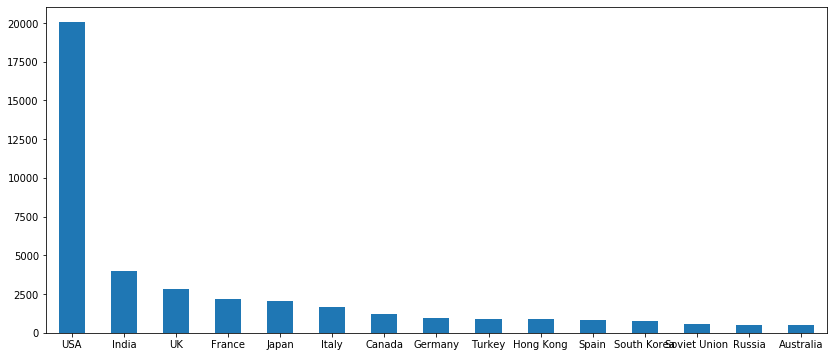

In [37]:
temp = df['country'].value_counts().head(15)
temp.plot(kind='bar',figsize=(14,6),rot='0')

In [38]:
temp=temp.reset_index()
temp.columns=['country','count']
temp

,country,count
0,USA,20055
1,India,4013
2,UK,2819
3,France,2193
4,Japan,2041
5,Italy,1657
6,Canada,1232
7,Germany,974
8,Turkey,896
9,Hong Kong,877


In [39]:
countries=temp['country'].unique()

In [40]:
countries

array(['USA', 'India', 'UK', 'France', 'Japan', 'Italy', 'Canada',
       'Germany', 'Turkey', 'Hong Kong', 'Spain', 'South Korea',
       'Soviet Union', 'Russia', 'Australia'], dtype=object)

### Top rated movie that has ratings on imdb and is available on netflix? (Use imdb Ratings dataset, imdb movies dataset and Netflix dataset)

In [41]:
joined= pd.merge(df,df_netflix,on='title') # content available on netflix

In [42]:
joined.shape

(1600, 21)

In [43]:
joined.columns

Index(['title', 'year', 'genre', 'duration_x', 'country_x', 'director_x',
       'writer', 'production_company', 'actors', 'avg_vote', 'show_id', 'type',
       'director_y', 'cast', 'country_y', 'date_added', 'release_year',
       'rating', 'duration_y', 'listed_in', 'description'],
      dtype='object')

In [44]:
joined = joined[joined['avg_vote'].notnull()]

In [45]:
joined.shape

(1600, 21)

In [46]:
df_vote = joined.sort_values(by = 'avg_vote',ascending=False)
rating = df_vote[0:10] #get the 1st 10 values
rating[['title','year','avg_vote']].reset_index(drop=True)

,title,year,avg_vote
0,Oththa Seruppu Size 7,2019,9.1
1,Schindler's List,1993,8.9
2,Merku Thodarchi Malai,2018,8.8
3,Inception,2010,8.8
4,Eh Janam Tumhare Lekhe,2015,8.7
5,The Irishman,2019,8.7
6,Koshish,1972,8.6
7,Masoom,1983,8.5
8,Guru,1997,8.5
9,American History X,1998,8.5


The above data represents the Top rated movie that has ratings on imdb and is available on netflix.

### Name the country that has the second highest rated content. (Use imdb Ratings dataset, imdb movies dataset and Netflix dataset)

In [47]:
df_grouped = df.groupby('country')

In [48]:
rating={}
for i in countries:
    data=df_grouped.get_group(i)
    rating[i]=round(data['avg_vote'].mean(),2)

In [49]:
country_ratings=pd.DataFrame(rating.items(), columns=['Country', 'Rating'])
country_ratings.sort_values(by=['Rating'], inplace=True,ascending=False)
country_ratings.reset_index(drop=True)

,Country,Rating
0,Soviet Union,7.10
1,Japan,6.54
2,South Korea,6.42
3,India,6.28
4,France,6.14
5,Hong Kong,6.11
6,Turkey,5.93
7,Germany,5.92
8,Italy,5.87
9,Spain,5.81


Ans: <b>Japan</b> has the second Highest rated content

### Recommender System

In [51]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81088285,Movie,The Mayo Clinic,"Ken Burns, Christopher Loren Ewers, Erik Ewers",Peter Coyote,United States,April,2018,TV-14,116 min,Documentaries,A look at how a world-renowned medical institu...
1,81077597,Movie,I Am,Onir,"Juhi Chawla, Rahul Bose, Nandita Das, Sanjay S...","India, Japan",March,2010,TV-MA,106 min,"Dramas, Independent Movies, International Movies",Four individuals in modern India grapple with ...
2,1150871,Movie,Love Jones,Theodore Witcher,"Larenz Tate, Nia Long, Isaiah Washington, Lisa...",United States,November,1997,R,109 min,"Comedies, Dramas, Independent Movies","In this urban romantic comedy set in Chicago, ..."
3,20077944,Movie,Ghayal,Rajkumar Santoshi,"Sunny Deol, Meenakshi Sheshadri, Amrish Puri, ...",India,December,1990,TV-14,163 min,"Action & Adventure, Dramas, International Movies","Framed for his older brother's murder, a boxer..."
4,80223779,Movie,Marriage Story,Noah Baumbach,"Scarlett Johansson, Adam Driver, Laura Dern, A...","United States, United Kingdom",December,2019,R,137 min,Dramas,Academy Award-nominated filmmaker Noah Baumbac...


In [52]:
df = df_netflix[['title','director','listed_in','description']]

In [55]:
df.columns=['title','director','genre','description']
df.head()

,title,director,genre,description
0,The Mayo Clinic,"Ken Burns, Christopher Loren Ewers, Erik Ewers",Documentaries,A look at how a world-renowned medical institu...
1,I Am,Onir,"Dramas, Independent Movies, International Movies",Four individuals in modern India grapple with ...
2,Love Jones,Theodore Witcher,"Comedies, Dramas, Independent Movies","In this urban romantic comedy set in Chicago, ..."
3,Ghayal,Rajkumar Santoshi,"Action & Adventure, Dramas, International Movies","Framed for his older brother's murder, a boxer..."
4,Marriage Story,Noah Baumbach,Dramas,Academy Award-nominated filmmaker Noah Baumbac...


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

In [57]:
from sklearn.metrics.pairwise import linear_kernel
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(4326, 13433)

In [58]:
cosine_sim =  linear_kernel(tfidf_matrix, tfidf_matrix, True)

In [59]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [60]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [65]:
print(get_recommendations('The Mayo Clinic').head(5))

2926    The Bleeding Edge
1724          Jersey Boys
3486             End Game
2105       Bride For Rent
86        Madam Secretary
Name: title, dtype: object


As we can see, for the recommendation: 
"Top 3 recommended movies for the movie The Mayo Clinic are  <b>The Bleeding Edge, Jersey Boys, End Game</b>